In [48]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import tensorflow as tf
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
import json
import string
import re

In [8]:
df = pd.DataFrame({'category': ['OPINION'],
        'headline':['I choose a lazy person to do a hard job. Because a lazy person will find an easy way to do it.']})

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Textual data
text = ["I choose a lazy person to do a hard job. Because a lazy person will find an easy way to do it."]

vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)

print(vectorizer.vocabulary_)

# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'choose': 2, 'lazy': 9, 'person': 10, 'to': 11, 'do': 3, 'hard': 6, 'job': 8, 'because': 1, 'will': 13, 'find': 5, 'an': 0, 'easy': 4, 'way': 12, 'it': 7}
(1, 14)
[[1 1 1 2 1 1 1 1 1 2 2 2 1 1]]


In [49]:
df = pd.read_json("test.json", lines=True)
df

,category,headline,link
0,TECHNOLOGY,IBM plans to replace 30% jobs with AI: reports,https://www.thedailystar.net/tech-startup/news...
1,TECHNOLOGY,Musk threatens to reassign NPR Twitter account...,https://www.thedailystar.net/tech-startup/scie...
2,TECHNOLOGY,Samsung brings Galaxy A34 5G and Galaxy A54 5G...,https://www.thedailystar.net/tech-startup/news...
3,TECHNOLOGY,Smart delivery lockers to be installed in metr...,https://www.thedailystar.net/tech-startup/news...
4,TECHNOLOGY,The Godfather of AI quits Google; warns of imp...,https://www.thedailystar.net/tech-startup/news...
...,...,...,...
1995,YOUTH,Bangladeshi tech wizard developing food-delive...,https://www.thedailystar.net/youth/young-icons...
1996,YOUTH,Skipping towards Guinness World Records,https://www.thedailystar.net/youth/young-icons...
1997,YOUTH,Team Bangladesh wins four bronze medals at Int...,https://www.thedailystar.net/youth/young-icons...
1998,YOUTH,Building the path to a data-driven Bangladesh,https://www.thedailystar.net/youth/young-icons...


In [15]:
df=df.sample(frac=1)
df

,category,headline,link
80,TECHNOLOGY,Meta introduces fact-checking course in Bangla...,https://www.thedailystar.net/tech-startup/news...
1056,NATIONAL,Eid holiday to be extended as 20 April declare...,https://en.prothomalo.com/bangladesh/qhooo1paej
1527,POLITICS,Razzaque: BNP will join elections eventually,https://www.dhakatribune.com/politics/2023/03/...
654,ENVIRONMENT,Dhaka's air most polluted in the world this mo...,https://www.thedailystar.net/environment/pollu...
989,INTERNATIONAL,Pakistan 'to agree' to tough IMF conditions as...,https://en.prothomalo.com/international/south-...
...,...,...,...
736,ENVIRONMENT,Dhaka 3rd most polluted city in the world this...,https://www.thedailystar.net/environment/pollu...
1920,YOUTH,Building a space-sharing marketplace,https://www.thedailystar.net/star-youth/news/b...
817,INTERNATIONAL,Gas leak in India's Punjab kills 11 people: Of...,https://en.prothomalo.com/international/india/...
455,ENTERTAINMENT,PM Hasina urges film makers to make life-orien...,https://en.prothomalo.com/entertainment/music/...


In [50]:
df=df[['category','headline']]
outputs=df['category'].unique()
outputs

array(['TECHNOLOGY', 'BUSINESS', 'ENTERTAINMENT', 'ENVIRONMENT',
       'INTERNATIONAL', 'NATIONAL', 'LIFESTYLE', 'POLITICS', 'SPORTS',
       'YOUTH'], dtype=object)

In [17]:
df

,category,headline
80,TECHNOLOGY,Meta introduces fact-checking course in Bangla...
1056,NATIONAL,Eid holiday to be extended as 20 April declare...
1527,POLITICS,Razzaque: BNP will join elections eventually
654,ENVIRONMENT,Dhaka's air most polluted in the world this mo...
989,INTERNATIONAL,Pakistan 'to agree' to tough IMF conditions as...
...,...,...
736,ENVIRONMENT,Dhaka 3rd most polluted city in the world this...
1920,YOUTH,Building a space-sharing marketplace
817,INTERNATIONAL,Gas leak in India's Punjab kills 11 people: Of...
455,ENTERTAINMENT,PM Hasina urges film makers to make life-orien...


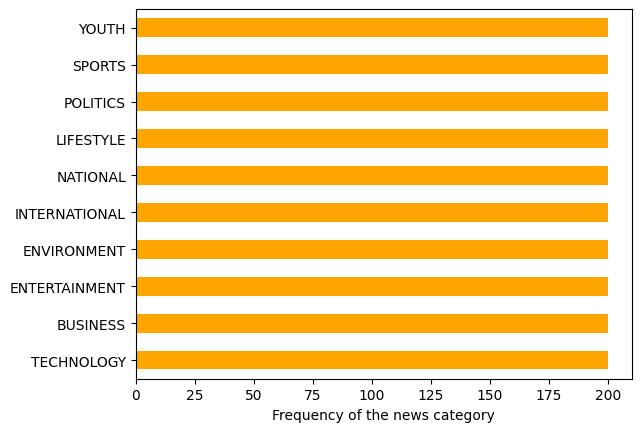

In [103]:

df.category.value_counts().sort_values().plot(kind = 'barh' ,color='orange')
plt.xlabel("Frequency of the news category")

plt.show()

In [51]:
df['cleaned_headline']=df['headline'].str.lower()
df

,category,headline,cleaned_headline
0,TECHNOLOGY,IBM plans to replace 30% jobs with AI: reports,ibm plans to replace 30% jobs with ai: reports
1,TECHNOLOGY,Musk threatens to reassign NPR Twitter account...,musk threatens to reassign npr twitter account...
2,TECHNOLOGY,Samsung brings Galaxy A34 5G and Galaxy A54 5G...,samsung brings galaxy a34 5g and galaxy a54 5g...
3,TECHNOLOGY,Smart delivery lockers to be installed in metr...,smart delivery lockers to be installed in metr...
4,TECHNOLOGY,The Godfather of AI quits Google; warns of imp...,the godfather of ai quits google; warns of imp...
...,...,...,...
1995,YOUTH,Bangladeshi tech wizard developing food-delive...,bangladeshi tech wizard developing food-delive...
1996,YOUTH,Skipping towards Guinness World Records,skipping towards guinness world records
1997,YOUTH,Team Bangladesh wins four bronze medals at Int...,team bangladesh wins four bronze medals at int...
1998,YOUTH,Building the path to a data-driven Bangladesh,building the path to a data-driven bangladesh


In [52]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
def removePunctuations(text):
    punc=string.punctuation
    return text.translate(str.maketrans('','',punc))


In [54]:
df['cleaned_headline']=df['cleaned_headline'].apply(lambda x: removePunctuations(x))

df

,category,headline,cleaned_headline
0,TECHNOLOGY,IBM plans to replace 30% jobs with AI: reports,ibm plans to replace 30 jobs with ai reports
1,TECHNOLOGY,Musk threatens to reassign NPR Twitter account...,musk threatens to reassign npr twitter account...
2,TECHNOLOGY,Samsung brings Galaxy A34 5G and Galaxy A54 5G...,samsung brings galaxy a34 5g and galaxy a54 5g...
3,TECHNOLOGY,Smart delivery lockers to be installed in metr...,smart delivery lockers to be installed in metr...
4,TECHNOLOGY,The Godfather of AI quits Google; warns of imp...,the godfather of ai quits google warns of impe...
...,...,...,...
1995,YOUTH,Bangladeshi tech wizard developing food-delive...,bangladeshi tech wizard developing fooddeliver...
1996,YOUTH,Skipping towards Guinness World Records,skipping towards guinness world records
1997,YOUTH,Team Bangladesh wins four bronze medals at Int...,team bangladesh wins four bronze medals at int...
1998,YOUTH,Building the path to a data-driven Bangladesh,building the path to a datadriven bangladesh


In [55]:
STOPWORDS = set(stopwords.words('english'))
def removeSW(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])

In [56]:
df['cleaned_headline']=df['cleaned_headline'].apply(lambda x: removeSW(x))
df

,category,headline,cleaned_headline
0,TECHNOLOGY,IBM plans to replace 30% jobs with AI: reports,ibm plans replace 30 jobs ai reports
1,TECHNOLOGY,Musk threatens to reassign NPR Twitter account...,musk threatens reassign npr twitter account np...
2,TECHNOLOGY,Samsung brings Galaxy A34 5G and Galaxy A54 5G...,samsung brings galaxy a34 5g galaxy a54 5g ban...
3,TECHNOLOGY,Smart delivery lockers to be installed in metr...,smart delivery lockers installed metro rail st...
4,TECHNOLOGY,The Godfather of AI quits Google; warns of imp...,godfather ai quits google warns impending danger
...,...,...,...
1995,YOUTH,Bangladeshi tech wizard developing food-delive...,bangladeshi tech wizard developing fooddeliver...
1996,YOUTH,Skipping towards Guinness World Records,skipping towards guinness world records
1997,YOUTH,Team Bangladesh wins four bronze medals at Int...,team bangladesh wins four bronze medals intl e...
1998,YOUTH,Building the path to a data-driven Bangladesh,building path datadriven bangladesh


In [35]:
def removeSC(text):
    text=re.sub('[^a-zA-Z0-9]',' ',text)
    text=re.sub('\s+',' ',text)
    return text

In [36]:
df['cleaned_headline']=df['cleaned_headline'].apply(lambda x: removeSC(x))
df

,category,headline,cleaned_headline
1311,LIFESTYLE,Styling ideas for Ramadan family get-togethers,styling ideas ramadan family gettogethers
917,INTERNATIONAL,How Turkey's opposition plans to roll back Erd...,turkeys opposition plans roll back erdogans po...
326,BUSINESS,IPDC Finance's profit declines 93% in January-...,ipdc finances profit declines 93 januarymarch
360,BUSINESS,Incentives planned for 12 sectors,incentives planned 12 sectors
405,ENTERTAINMENT,Mosharraf Karim to star in a new tele-series '...,mosharraf karim star new teleseries golokdhadha
...,...,...,...
1566,POLITICS,BNP sends relief to earthquake-hit Turkey,bnp sends relief earthquakehit turkey
1488,POLITICS,BNP demands fresh Supreme Court Bar Associatio...,bnp demands fresh supreme court bar associatio...
1384,LIFESTYLE,OCD: More than just an obsession with cleaning,ocd obsession cleaning
1064,NATIONAL,Country's population reaches nearly 170 million,countrys population reaches nearly 170 million


In [57]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def stemWords(text):
    return " ".join([ps.stem(word) for word in text.split()])



In [58]:
df['stemmed_headline']=df['cleaned_headline'].apply(lambda x: stemWords(x))
df

,category,headline,cleaned_headline,stemmed_headline
0,TECHNOLOGY,IBM plans to replace 30% jobs with AI: reports,ibm plans replace 30 jobs ai reports,ibm plan replac 30 job ai report
1,TECHNOLOGY,Musk threatens to reassign NPR Twitter account...,musk threatens reassign npr twitter account np...,musk threaten reassign npr twitter account npr...
2,TECHNOLOGY,Samsung brings Galaxy A34 5G and Galaxy A54 5G...,samsung brings galaxy a34 5g galaxy a54 5g ban...,samsung bring galaxi a34 5g galaxi a54 5g bang...
3,TECHNOLOGY,Smart delivery lockers to be installed in metr...,smart delivery lockers installed metro rail st...,smart deliveri locker instal metro rail station
4,TECHNOLOGY,The Godfather of AI quits Google; warns of imp...,godfather ai quits google warns impending danger,godfath ai quit googl warn impend danger
...,...,...,...,...
1995,YOUTH,Bangladeshi tech wizard developing food-delive...,bangladeshi tech wizard developing fooddeliver...,bangladeshi tech wizard develop fooddeliveri r...
1996,YOUTH,Skipping towards Guinness World Records,skipping towards guinness world records,skip toward guin world record
1997,YOUTH,Team Bangladesh wins four bronze medals at Int...,team bangladesh wins four bronze medals intl e...,team bangladesh win four bronz medal intl econ...
1998,YOUTH,Building the path to a data-driven Bangladesh,building path datadriven bangladesh,build path datadriven bangladesh


In [59]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()
def lemmatizeWords(text):
    return " ".join([lm.lemmatize(word) for word in text.split()])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TACHLAND\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [60]:
df['lemmatized_headline']=df['cleaned_headline'].apply(lambda x: lemmatizeWords(x))
df

,category,headline,cleaned_headline,stemmed_headline,lemmatized_headline
0,TECHNOLOGY,IBM plans to replace 30% jobs with AI: reports,ibm plans replace 30 jobs ai reports,ibm plan replac 30 job ai report,ibm plan replace 30 job ai report
1,TECHNOLOGY,Musk threatens to reassign NPR Twitter account...,musk threatens reassign npr twitter account np...,musk threaten reassign npr twitter account npr...,musk threatens reassign npr twitter account np...
2,TECHNOLOGY,Samsung brings Galaxy A34 5G and Galaxy A54 5G...,samsung brings galaxy a34 5g galaxy a54 5g ban...,samsung bring galaxi a34 5g galaxi a54 5g bang...,samsung brings galaxy a34 5g galaxy a54 5g ban...
3,TECHNOLOGY,Smart delivery lockers to be installed in metr...,smart delivery lockers installed metro rail st...,smart deliveri locker instal metro rail station,smart delivery locker installed metro rail sta...
4,TECHNOLOGY,The Godfather of AI quits Google; warns of imp...,godfather ai quits google warns impending danger,godfath ai quit googl warn impend danger,godfather ai quits google warns impending danger
...,...,...,...,...,...
1995,YOUTH,Bangladeshi tech wizard developing food-delive...,bangladeshi tech wizard developing fooddeliver...,bangladeshi tech wizard develop fooddeliveri r...,bangladeshi tech wizard developing fooddeliver...
1996,YOUTH,Skipping towards Guinness World Records,skipping towards guinness world records,skip toward guin world record,skipping towards guinness world record
1997,YOUTH,Team Bangladesh wins four bronze medals at Int...,team bangladesh wins four bronze medals intl e...,team bangladesh win four bronz medal intl econ...,team bangladesh win four bronze medal intl eco...
1998,YOUTH,Building the path to a data-driven Bangladesh,building path datadriven bangladesh,build path datadriven bangladesh,building path datadriven bangladesh


In [73]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le=LabelEncoder()
ohe=OneHotEncoder()
le.fit(df['category'])

LabelEncoder()

In [74]:
i=0
d={}
for x in le.classes_:
    print('{}  {}'.format(x,i))
    d[x]=i
    i=i+1

BUSINESS  0
ENTERTAINMENT  1
ENVIRONMENT  2
INTERNATIONAL  3
LIFESTYLE  4
NATIONAL  5
POLITICS  6
SPORTS  7
TECHNOLOGY  8
YOUTH  9


In [75]:
df['Encoded Category']=le.transform(df['category'])
df['Encoded Category']=df['Encoded Category'].astype(int)
df

,category,headline,cleaned_headline,stemmed_headline,lemmatized_headline,Encoded Category
0,TECHNOLOGY,IBM plans to replace 30% jobs with AI: reports,ibm plans replace 30 jobs ai reports,ibm plan replac 30 job ai report,ibm plan replace 30 job ai report,8
1,TECHNOLOGY,Musk threatens to reassign NPR Twitter account...,musk threatens reassign npr twitter account np...,musk threaten reassign npr twitter account npr...,musk threatens reassign npr twitter account np...,8
2,TECHNOLOGY,Samsung brings Galaxy A34 5G and Galaxy A54 5G...,samsung brings galaxy a34 5g galaxy a54 5g ban...,samsung bring galaxi a34 5g galaxi a54 5g bang...,samsung brings galaxy a34 5g galaxy a54 5g ban...,8
3,TECHNOLOGY,Smart delivery lockers to be installed in metr...,smart delivery lockers installed metro rail st...,smart deliveri locker instal metro rail station,smart delivery locker installed metro rail sta...,8
4,TECHNOLOGY,The Godfather of AI quits Google; warns of imp...,godfather ai quits google warns impending danger,godfath ai quit googl warn impend danger,godfather ai quits google warns impending danger,8
...,...,...,...,...,...,...
1995,YOUTH,Bangladeshi tech wizard developing food-delive...,bangladeshi tech wizard developing fooddeliver...,bangladeshi tech wizard develop fooddeliveri r...,bangladeshi tech wizard developing fooddeliver...,9
1996,YOUTH,Skipping towards Guinness World Records,skipping towards guinness world records,skip toward guin world record,skipping towards guinness world record,9
1997,YOUTH,Team Bangladesh wins four bronze medals at Int...,team bangladesh wins four bronze medals intl e...,team bangladesh win four bronz medal intl econ...,team bangladesh win four bronze medal intl eco...,9
1998,YOUTH,Building the path to a data-driven Bangladesh,building path datadriven bangladesh,build path datadriven bangladesh,building path datadriven bangladesh,9


In [101]:
from sklearn.model_selection import train_test_split
x=df['stemmed_headline']
y=df['Encoded Category']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,stratify=df['Encoded Category'].values)

In [102]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB


mnb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
mnb.fit(xtrain,ytrain)

ypred1 = mnb.predict(xtest)

print(f'accuracy {accuracy_score(ypred1,ytest)}')

accuracy 0.72


In [103]:
from sklearn.linear_model import LogisticRegression
lgr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression(random_state=0)),
              ])
lgr.fit(xtrain,ytrain)

lr_pred = lgr.predict(xtest)
print(f'accuracy {accuracy_score(lr_pred,ytest)}')

accuracy 0.705


In [104]:
from sklearn.svm import LinearSVC
lsvc = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf',  LinearSVC()),
              ])
lsvc.fit(xtrain,ytrain)

lsvc_pred = lsvc.predict(xtest)
print(f'accuracy {accuracy_score(lsvc_pred,ytest)}')

accuracy 0.765


In [146]:
from sklearn.ensemble import RandomForestClassifier
rf = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf',   RandomForestClassifier(n_estimators=150, max_depth=20, random_state=0)),
              ])
rf.fit(xtrain,ytrain)

rf_pred = rf.predict(xtest)
print(f'accuracy {accuracy_score(rf_pred,ytest)}')

accuracy 0.585


In [115]:
from sklearn.metrics import classification_report
print(classification_report(og,pre))

               precision    recall  f1-score   support

     BUSINESS       0.70      0.80      0.74        20
ENTERTAINMENT       0.80      0.80      0.80        20
  ENVIRONMENT       0.70      0.70      0.70        20
INTERNATIONAL       0.70      0.80      0.74        20
    LIFESTYLE       0.83      0.75      0.79        20
     NATIONAL       0.59      0.50      0.54        20
     POLITICS       0.83      0.95      0.88        20
       SPORTS       0.90      0.95      0.93        20
   TECHNOLOGY       0.75      0.60      0.67        20
        YOUTH       0.84      0.80      0.82        20

     accuracy                           0.77       200
    macro avg       0.76      0.76      0.76       200
 weighted avg       0.76      0.77      0.76       200



Text(0.5, 36.72222222222221, 'Predicted Values')

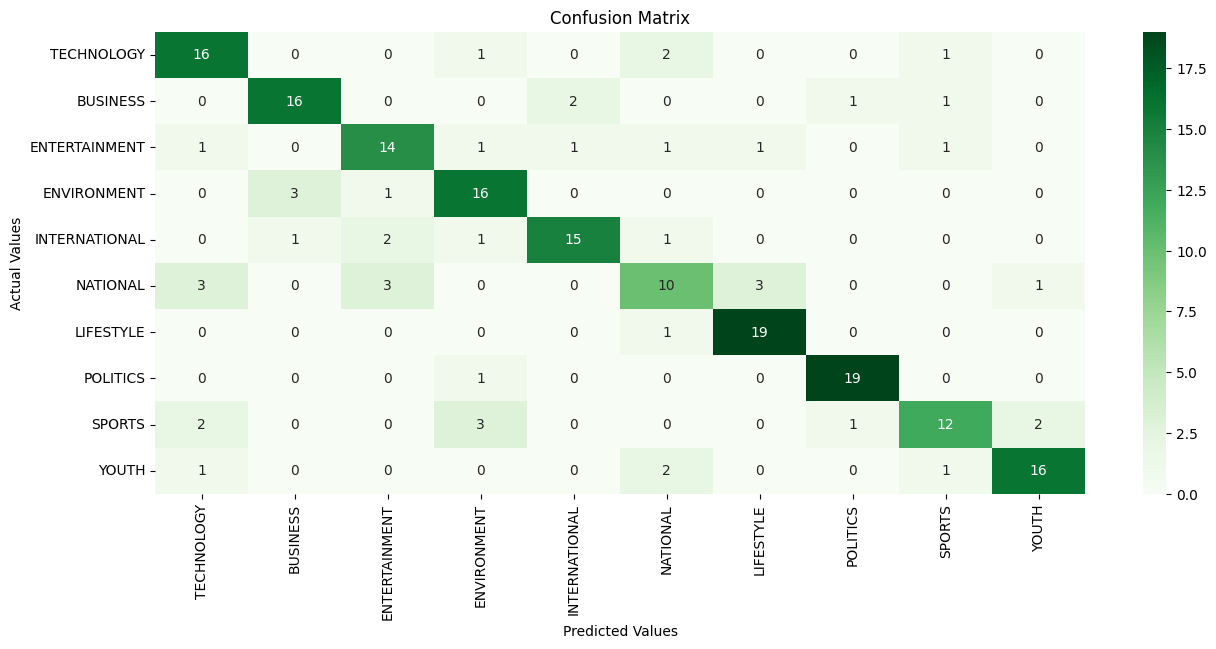

In [116]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
outputs=df['category'].unique()

cm = confusion_matrix(og,pre)
cm_df = pd.DataFrame(cm,
                    outputs, 
                    outputs)
#Plotting the confusion matrix
plt.figure(figsize=(15,6))
sns.heatmap(cm_df, annot=True,cmap="Greens")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

In [114]:
pre=le.inverse_transform(lsvc_pred)
og=le.inverse_transform(ytest)

In [127]:
news="CPD raises flag over US turning into top remittance source"
news=news.lower()
news=removePunctuations(news)
news=removePunctuations(news)
news=stemWords(news)
lsvcout=lsvc.predict([news])
lsvcout=le.inverse_transform([lsvcout])
lgrcout=lgr.predict([news])
lgrcout=le.inverse_transform([lgrcout])
mnbcout=mnb.predict([news])
mnbcout=le.inverse_transform([mnbcout])
print("According to Linear SVC news belongs to '"+lsvcout[0]+"' category.\n")
print("According to LR news belongs to '"+lgrcout[0]+"' category.\n")
print("According to Multinomial NB news belongs to '"+mnbcout[0]+"' category.\n\n")

According to Linear SVC news belongs to 'BUSINESS' category.

According to LR news belongs to 'BUSINESS' category.

According to Multinomial NB news belongs to 'BUSINESS' category.




D:\Anaconda\envs\demo\lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\envs\demo\lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\envs\demo\lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
